### ADCP locations of Barkely and Astoria Canyona data used in revision of paper 2


OII node

* sourceUrl = "http://oceanobservatories.org/" ;
* publisher_name = "Ocean Observatories Initiative" ;
* lat = 46.85083 ;
* lon = -124.97184 ;

ONC node
* lat = 48.42743
* lon= -126.1747 

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from netCDF4 import Dataset

%matplotlib inline

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [4]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [5]:
def get_topo():
    
    topo=sio.loadmat('/ocean/kramosmu/Data/SouthVIgrid.mat')
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}

    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))

    return tDat

def haversine(lon, lat):
    '''lon: np.array with longitudes
       lat: np array with latitudes
       returns: distance, np array with the distance between the points of lat, lon. Size is one less than lat, lon'''
    
    R = 6366.371 # km, Radius of earth at 48 deg N.
    dlon = lon[:-1] - lon[1:]
    dlat = lat[:-1] - lat[1:]
    a = (np.sin(dlat/2))**2 + (np.cos(lat[:-1]) * np.cos(lat[1:]) * (np.sin(dlon/2))**2)
    c = 2.0 * np.arctan2( np.sqrt(a), np.sqrt(1-a) )
    distance = R * c
    return distance

In [6]:
astoria_file = '/ocean/kramosmu/MultipleCanyons/data/gebco_bathy_Astoria/GEBCO_2014_Astoria.nc'

with Dataset(astoria_file, 'r') as nbl:
    dep_Ast = nbl.variables['elevation'][:]
    lon_Ast = nbl.variables['lon'][:]
    lat_Ast = nbl.variables['lat'][:]

In [7]:
# SouthVIgrid.mat gives lat shape 1474, lon shape 890 and dpth shape (890,1474)
tDat = get_topo()

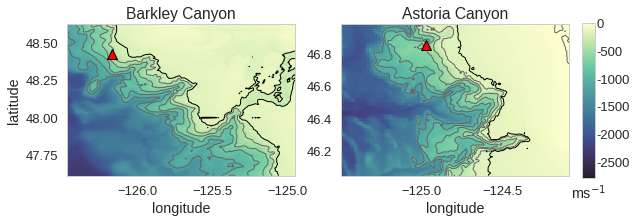

In [27]:
# Barkley
Wlim = 450 
Elim = 900
Nlim = 500
Slim = 50

# Astoria
AsW = 60
AsE =-90
AsN = -1
AsS = 80
plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

# Barkley
pmesh = ax1.pcolormesh(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],
               cmap=cmo.cm.deep_r,vmin=-2800, vmax=0)
CS = ax1.contour(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],
                 [-1200,-1000, -800, -600,-400,-200, 0],
                 colors=['0.4','0.4','0.4','0.4','0.4','k','0.4'],linewidths=[1])
ax1.set_aspect(1)
ax1.set_title('Barkley Canyon')
ax1.plot(-126.1747,48.42743, '^',color='r',markeredgewidth=1, markeredgecolor='k')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
# Astoria
ax2.pcolormesh(lon_Ast[AsW:AsE],lat_Ast[AsS:AsN],dep_Ast[AsS:AsN,AsW:AsE],cmap=cmo.cm.deep_r,vmin=-2800, vmax=0)
CS2 = ax2.contour(lon_Ast[AsW:AsE],lat_Ast[AsS:AsN],dep_Ast[AsS:AsN,AsW:AsE],
                  [-1200,-1000, -800, -600,-400,-200,-150, 0],
                  colors=['0.4','0.4','0.4','0.4','0.4','0.4','k','0.4'],
                  linewidths=[1] )
ax2.plot(-124.97184,46.85083, '^',color='r',markeredgewidth=1, markeredgecolor='k')
ax2.set_aspect(1)

cbar_ax = fig.add_axes([0.92, 0.14, 0.02, 0.72])
cb = plt.colorbar(pmesh, cax=cbar_ax,format='%1.0f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.ax.set_xlabel('ms$^{-1}$')
ax2.set_title('Astoria Canyon')
ax2.set_xlabel('longitude')
plt.savefig('adcp_locations.pdf',format='pdf', bbox_inches='tight')